In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from scipy.cluster import hierarchy

%matplotlib inline

In [2]:
plt.style.use('seaborn-whitegrid')

# 1

In [3]:
basket = pd.read_csv('my_basket.csv')

## a.

**WITH SCALING**

In [4]:
X = pd.DataFrame(scale(basket), index=basket.index, columns=basket.columns)

pca_loadings = pd.DataFrame(PCA().fit(X).components_.T, index=basket.columns, columns=['V'+str(x) for x in range(1,43)])

pca = PCA()

basket_plot = pd.DataFrame(pca.fit_transform(X), columns=['PC'+str(x) for x in range(1,43)], index=X.index)

In [5]:
basket_plot.var().head(5)

PC1    2.293097
PC2    2.173079
PC3    2.130078
PC4    2.076467
PC5    2.061056
dtype: float64

In [6]:
pca_loadings.var().head(5)

V1    0.024180
V2    0.024371
V3    0.021975
V4    0.017608
V5    0.023187
dtype: float64

**WITHOUT SCALING**

In [7]:
X_ns = basket
pca_loadings_ns = pd.DataFrame(PCA().fit(X_ns).components_.T, index=basket.columns, columns=['V'+str(x) for x in range(1,43)])
pca_ns = PCA()
basket_plot_ns = pd.DataFrame(pca_ns.fit_transform(X_ns), columns=['PC'+str(x) for x in range(1,43)], index=X_ns.index)

In [8]:
basket_plot_ns.var().sort_values()

PC42    0.032079
PC41    0.054855
PC40    0.055988
PC39    0.059602
PC38    0.060294
PC37    0.062852
PC36    0.064088
PC35    0.064346
PC34    0.067260
PC33    0.068455
PC32    0.074130
PC31    0.076292
PC30    0.076466
PC29    0.081220
PC28    0.097039
PC27    0.103776
PC26    0.108408
PC25    0.113743
PC24    0.130005
PC23    0.133987
PC22    0.139619
PC21    0.153789
PC20    0.158023
PC19    0.162487
PC18    0.178003
PC17    0.188719
PC16    0.202016
PC15    0.222230
PC14    0.230313
PC13    0.233572
PC12    0.244413
PC11    0.251430
PC10    0.271776
PC9     0.295158
PC8     0.310171
PC7     0.467149
PC6     0.483074
PC5     0.528501
PC4     0.531258
PC3     0.592782
PC2     0.728337
PC1     0.747408
dtype: float64

In [9]:
basket.mean().sort_values()

pate              0.0345
white.wine        0.0550
horlics           0.0560
whiskey           0.0590
leeks             0.0605
lottery           0.0665
toad.in.hole      0.0675
spinach           0.0675
sunny.delight     0.0675
yop               0.0685
lettuce           0.0705
ham               0.0705
soup              0.0740
bbq               0.0760
coco.pops         0.0970
broccoli          0.1055
fosters           0.1070
carrots           0.1110
kronenbourg       0.1120
7up               0.1435
cigarettes        0.1450
fanta             0.1450
peas              0.1500
mayonnaise        0.1525
muesli            0.1560
instant.coffee    0.1580
red.wine          0.1595
newspaper         0.2075
chicken.tikka     0.2075
tea               0.2110
bread             0.2175
bulmers           0.2265
pepsi             0.2285
cheese            0.2365
milk              0.2505
potatoes          0.2645
twix              0.2780
kitkat            0.2820
lasagna           0.2970
mars              0.3235


In [10]:
pca_loadings_ns.var().sort_values()

V7     0.016009
V5     0.020297
V6     0.023004
V32    0.023188
V29    0.023436
V16    0.023712
V3     0.023734
V11    0.023760
V24    0.023775
V17    0.023859
V8     0.023929
V31    0.023951
V4     0.024002
V21    0.024010
V42    0.024018
V10    0.024035
V27    0.024071
V41    0.024075
V39    0.024110
V38    0.024153
V20    0.024169
V33    0.024190
V15    0.024224
V37    0.024227
V28    0.024240
V23    0.024268
V34    0.024273
V35    0.024274
V22    0.024289
V36    0.024301
V18    0.024316
V2     0.024340
V14    0.024345
V9     0.024355
V1     0.024369
V30    0.024370
V25    0.024373
V26    0.024388
V12    0.024389
V13    0.024389
V19    0.024390
V40    0.024390
dtype: float64

<b>WITH SCALING and WITHOUT TRANSACTION IDs</b>

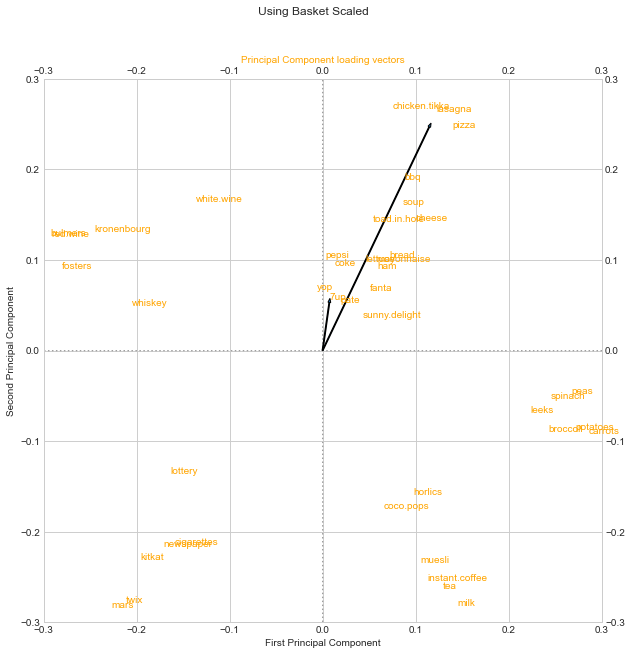

In [11]:
fig , ax1 = plt.subplots(figsize=(10,10))

ax1.set_xlim(-0.3, 0.3)
ax1.set_ylim(-0.3, 0.3)

# Plot Principal Components 1 and 2
"""for i in basket_plot.index:
    ax1.annotate(i, (basket_plot.PC1.loc[i], -basket_plot.PC2.loc[i]), ha='center')
"""
# Plot reference lines
ax1.hlines(0, -0.3, 0.3, linestyles='dotted', colors='grey')
ax1.vlines(0, -0.3, 0.3, linestyles='dotted', colors='grey')

ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')
fig.suptitle('Using Basket Scaled')
    
# Plot Principal Component loading vectors, using a second y-axis.
ax2 = ax1.twinx().twiny() 

ax2.set_ylim(-0.3, 0.3)
ax2.set_xlim(-0.3, 0.3)
ax2.tick_params(axis='y', colors='orange')
ax2.set_xlabel('Principal Component loading vectors', color='orange')

# Plot labels for vectors. Variable 'a' is a small offset parameter to separate arrow tip and text.
a = 1.07  
for i in pca_loadings[['V1', 'V2']].index:
    ax2.annotate(i, (pca_loadings.V1.loc[i]*a, -pca_loadings.V2.loc[i]*a), color='orange')

# Plot vectors
for i in range(0,2):
    ax2.arrow(0,0,pca_loadings.V1[i], -pca_loadings.V2[i])

**WITH SCALING AND WITH TRANSACTION IDS**

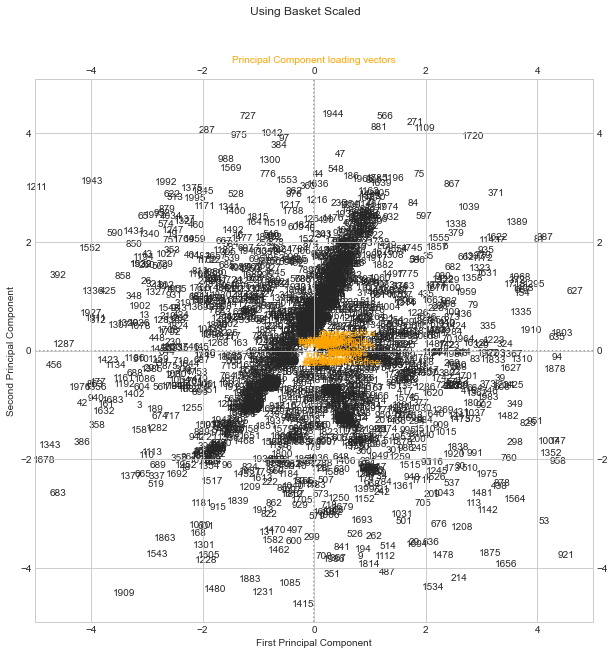

In [12]:
fig , ax1 = plt.subplots(figsize=(10,10))

ax1.set_xlim(-5,5)
ax1.set_ylim(-5,5)

# Plot Principal Components 1 and 2
for i in basket_plot.index:
    ax1.annotate(i, (basket_plot.PC1.loc[i], -basket_plot.PC2.loc[i]), ha='center')

# Plot reference lines
ax1.hlines(0, -5,5, linestyles='dotted', colors='grey')
ax1.vlines(0, -5,5, linestyles='dotted', colors='grey')

ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')
fig.suptitle('Using Basket Scaled')

    
# Plot Principal Component loading vectors, using a second y-axis.
ax2 = ax1.twinx().twiny() 

ax2.set_ylim(-5,5)
ax2.set_xlim(-5,5)
ax2.tick_params(axis='y', colors='orange')
ax2.set_xlabel('Principal Component loading vectors', color='orange')

# Plot labels for vectors. Variable 'a' is a small offset parameter to separate arrow tip and text.
a = 1.07  
for i in pca_loadings[['V1', 'V2']].index:
    ax2.annotate(i, (pca_loadings.V1.loc[i]*a, -pca_loadings.V2.loc[i]*a), color='orange')

# Plot vectors
for i in range(0,2):
    ax2.arrow(0,0,pca_loadings.V1[i], -pca_loadings.V2[i])

**WITHOUT SCALING AND WITHOUT TRANSACTION IDS**

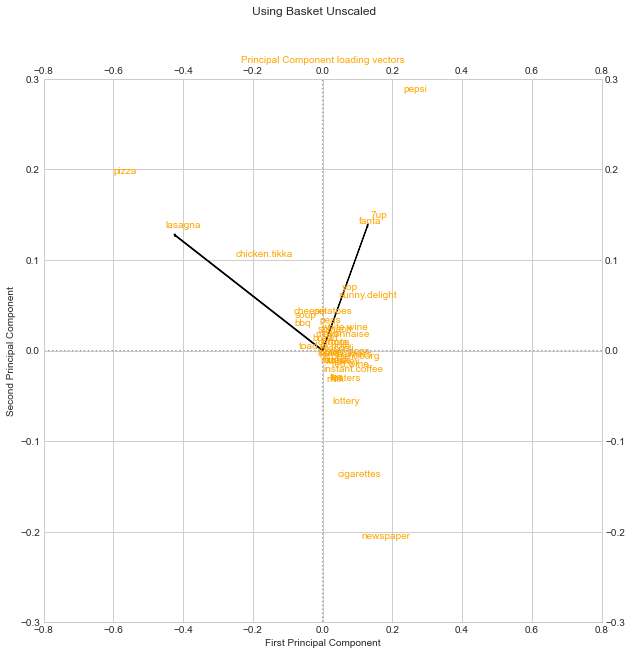

In [13]:
fig , ax1 = plt.subplots(figsize=(10,10))

ax1.set_xlim(-0.8,0.8)
ax1.set_ylim(-0.3, 0.3)

"""# Plot Principal Components 1 and 2
for i in basket_plot.index:
    ax1.annotate(i, (basket_plot.PC1.loc[i], -basket_plot.PC2.loc[i]), ha='center')
"""
# Plot reference lines
ax1.hlines(0,-0.8,0.8, linestyles='dotted', colors='grey')
ax1.vlines(0, -0.3, 0.3, linestyles='dotted', colors='grey')

ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')
fig.suptitle('Using Basket Unscaled')

    
# Plot Principal Component loading vectors, using a second y-axis.
ax2 = ax1.twinx().twiny() 

ax2.set_ylim(-0.3, 0.3)
ax2.set_xlim(-0.8,0.8)
ax2.tick_params(axis='y', colors='orange')
ax2.set_xlabel('Principal Component loading vectors', color='orange')

# Plot labels for vectors. Variable 'a' is a small offset parameter to separate arrow tip and text.
a = 1.07  
for i in pca_loadings[['V1', 'V2']].index:
    ax2.annotate(i, (pca_loadings_ns.V1.loc[i]*a, -pca_loadings_ns.V2.loc[i]*a), color='orange')

# Plot vectors
for i in range(0,2):
    ax2.arrow(0,0,pca_loadings_ns.V1[i], -pca_loadings_ns.V2[i])

**WITHOUT SCALING BUT WITH TRANSACTION IDS**

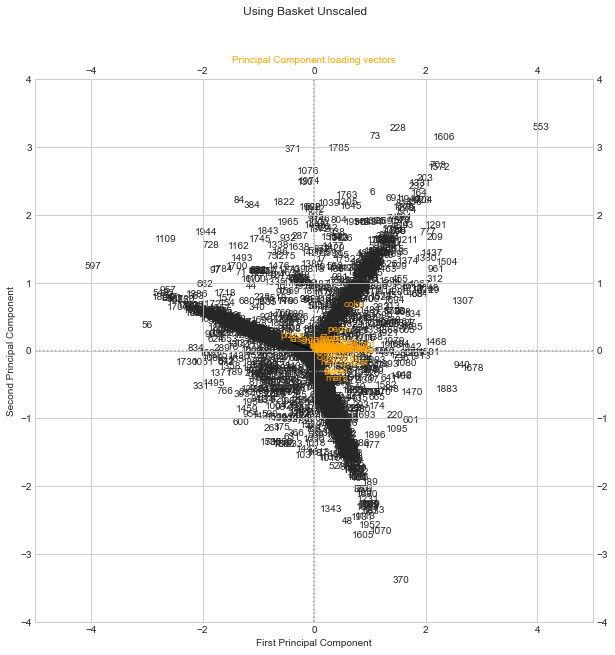

In [14]:
fig , ax1 = plt.subplots(figsize=(10,10))

ax1.set_xlim(-5,5)
ax1.set_ylim(-4,4)

# Plot Principal Components 1 and 2
for i in basket_plot_ns.index:
    ax1.annotate(i, (basket_plot_ns.PC1.loc[i], -basket_plot_ns.PC2.loc[i]), ha='center')

# Plot reference lines
ax1.hlines(0,-5,5, linestyles='dotted', colors='grey')
ax1.vlines(0, -4,4, linestyles='dotted', colors='grey')

ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')
fig.suptitle('Using Basket Unscaled')

    
# Plot Principal Component loading vectors, using a second y-axis.
ax2 = ax1.twinx().twiny() 

ax2.set_ylim(-4,4)
ax2.set_xlim(-5,5)
ax2.tick_params(axis='y', colors='orange')
ax2.set_xlabel('Principal Component loading vectors', color='orange')

# Plot labels for vectors. Variable 'a' is a small offset parameter to separate arrow tip and text.
a = 1.07  
for i in pca_loadings[['V1', 'V2']].index:
    ax2.annotate(i, (pca_loadings_ns.V1.loc[i]*a, -pca_loadings_ns.V2.loc[i]*a), color='orange')

# Plot vectors
for i in range(0,2):
    ax2.arrow(0,0,pca_loadings_ns.V1[i], -pca_loadings_ns.V2[i])

It is better to not scale this data. The difference in magnitudes in measurement between any two variables is insignificant. When scaling the data, we see information lost in the graphs plotting PC1 versus PC2 such as potential grouping. Additionally, as can be seen in part b, PC1 AND PC2 when using the unscaled data explains more of the variance than when using scaled data.

In [15]:
pca.explained_variance_ratio_[0:2]

array([0.05457025, 0.05171412])

In [16]:
np.cumsum(pca.explained_variance_ratio_)[1]

0.10628436140641337

In [17]:
pca_ns.explained_variance_ratio_[0:2]

array([0.08393016, 0.08178862])

In [18]:
np.cumsum(pca_ns.explained_variance_ratio_)[1]

0.16571877869686324

PC1 explains about 8.4% of the variance and PC2 explains about 8.2% of the variance. The cumulative variance explained by PC1 and PC2 is about 16.6%.

In [19]:
from sklearn import cluster

In [20]:
hlabels = cluster.AgglomerativeClustering(n_clusters=3, linkage='ward').fit_predict(X_ns)
basket['hier_label3'] = hlabels

In [21]:
def pick_color(cl):
    colors = ['#3291a8','#4bd4db','#ba4bdb']
    return colors[cl]

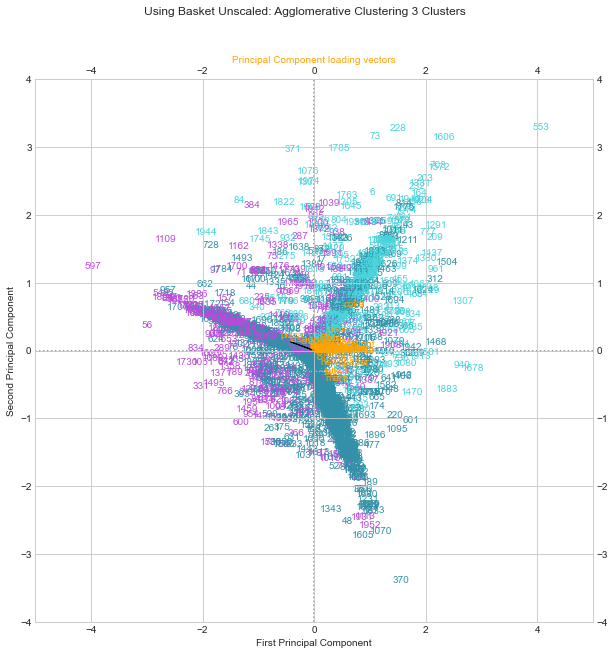

In [22]:
fig , ax1 = plt.subplots(figsize=(10,10))

ax1.set_xlim(-5,5)
ax1.set_ylim(-4,4)

# Plot Principal Components 1 and 2
for i in basket_plot_ns.index:
    ax1.annotate(i, (basket_plot_ns.PC1.loc[i], -basket_plot_ns.PC2.loc[i]), ha='center',color=pick_color(basket['hier_label3'].loc[i]))

# Plot reference lines
ax1.hlines(0,-5,5, linestyles='dotted', colors='grey')
ax1.vlines(0, -4,4, linestyles='dotted', colors='grey')

ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')
fig.suptitle('Using Basket Unscaled: Agglomerative Clustering 3 Clusters')
    
# Plot Principal Component loading vectors, using a second y-axis.
ax2 = ax1.twinx().twiny() 

ax2.set_ylim(-4,4)
ax2.set_xlim(-5,5)
ax2.tick_params(axis='y', colors='orange')
ax2.set_xlabel('Principal Component loading vectors', color='orange')

# Plot labels for vectors. Variable 'a' is a small offset parameter to separate arrow tip and text.
a = 1.07  
for i in pca_loadings[['V1', 'V2']].index:
    ax2.annotate(i, (pca_loadings_ns.V1.loc[i]*a, -pca_loadings_ns.V2.loc[i]*a), color='orange')

# Plot vectors
for i in range(0,2):
    ax2.arrow(0,0,pca_loadings_ns.V1[i], -pca_loadings_ns.V2[i])

Hierarchical clusetering with three groups appears to work well with the non-scaled data, but appears somewhat unclear with the scaled data

### 4 groups

In [23]:
hlabels_4 = cluster.AgglomerativeClustering(n_clusters=4, linkage='ward').fit_predict(X_ns)
basket['hier_label4'] = hlabels_4

In [24]:
def pick_color_4(cl):
    colors = ['#3291a8','#4bd4db','#ba4bdb','#ff2197']
    return colors[cl]

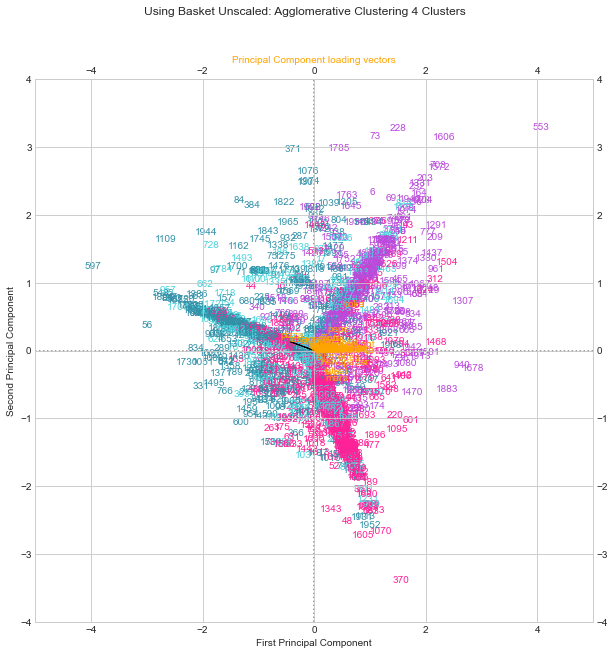

In [25]:
fig , ax1 = plt.subplots(figsize=(10,10))

ax1.set_xlim(-5,5)
ax1.set_ylim(-4,4)

# Plot Principal Components 1 and 2
for i in basket_plot_ns.index:
    ax1.annotate(i, (basket_plot_ns.PC1.loc[i], -basket_plot_ns.PC2.loc[i]), ha='center',color=pick_color_4(basket['hier_label4'].loc[i]))

# Plot reference lines
ax1.hlines(0,-5,5, linestyles='dotted', colors='grey')
ax1.vlines(0, -4,4, linestyles='dotted', colors='grey')

ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')
fig.suptitle('Using Basket Unscaled: Agglomerative Clustering 4 Clusters')
    
# Plot Principal Component loading vectors, using a second y-axis.
ax2 = ax1.twinx().twiny() 

ax2.set_ylim(-4,4)
ax2.set_xlim(-5,5)
ax2.tick_params(axis='y', colors='orange')
ax2.set_xlabel('Principal Component loading vectors', color='orange')

# Plot labels for vectors. Variable 'a' is a small offset parameter to separate arrow tip and text.
a = 1.07  
for i in pca_loadings[['V1', 'V2']].index:
    ax2.annotate(i, (pca_loadings_ns.V1.loc[i]*a, -pca_loadings_ns.V2.loc[i]*a), color='orange')

# Plot vectors
for i in range(0,2):
    ax2.arrow(0,0,pca_loadings_ns.V1[i], -pca_loadings_ns.V2[i])

### 5 groups

In [26]:
hlabels_5 = cluster.AgglomerativeClustering(n_clusters=5, linkage='ward').fit_predict(X_ns)
basket['hier_label5'] = hlabels_5

In [27]:
def pick_color_5(cl):
    colors = ['#3291a8','#4bd4db','#ba4bdb','#ff2197','#7ad470']
    return colors[cl]

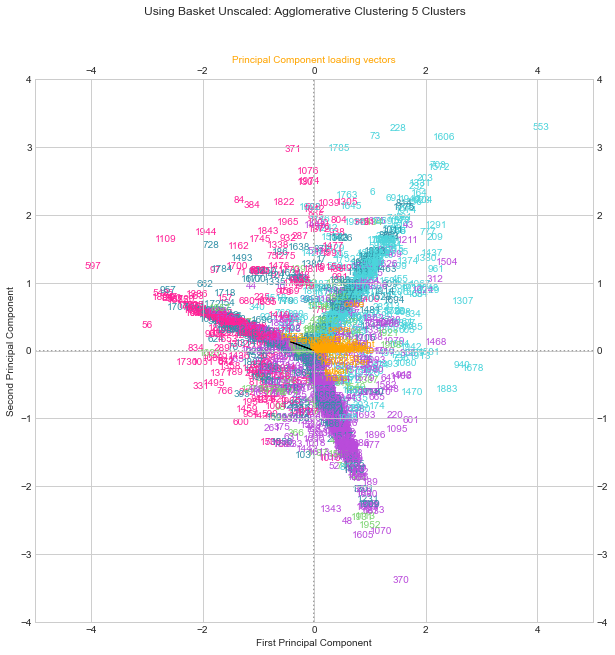

In [28]:
fig , ax1 = plt.subplots(figsize=(10,10))

ax1.set_xlim(-5,5)
ax1.set_ylim(-4,4)

# Plot Principal Components 1 and 2
for i in basket_plot_ns.index:
    ax1.annotate(i, (basket_plot_ns.PC1.loc[i], -basket_plot_ns.PC2.loc[i]), ha='center',color=pick_color_5(basket['hier_label5'].loc[i]))

# Plot reference lines
ax1.hlines(0,-5,5, linestyles='dotted', colors='grey')
ax1.vlines(0, -4,4, linestyles='dotted', colors='grey')

ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')
fig.suptitle('Using Basket Unscaled: Agglomerative Clustering 5 Clusters')
    
# Plot Principal Component loading vectors, using a second y-axis.
ax2 = ax1.twinx().twiny() 

ax2.set_ylim(-4,4)
ax2.set_xlim(-5,5)
ax2.tick_params(axis='y', colors='orange')
ax2.set_xlabel('Principal Component loading vectors', color='orange')

# Plot labels for vectors. Variable 'a' is a small offset parameter to separate arrow tip and text.
a = 1.07  
for i in pca_loadings[['V1', 'V2']].index:
    ax2.annotate(i, (pca_loadings_ns.V1.loc[i]*a, -pca_loadings_ns.V2.loc[i]*a), color='orange')

# Plot vectors
for i in range(0,2):
    ax2.arrow(0,0,pca_loadings_ns.V1[i], -pca_loadings_ns.V2[i])

Clustering with 4 or 5 groups appears to be the most ideal. At 4 levels of grouping, however, one of the groups spreads over two of the prongs (if we describe the three-way shape here as having three prongs). At 5 levels of grouping, we see less of an overlap of grouping.

In [29]:
kmeans = cluster.KMeans(n_clusters=3)
k_labels = kmeans.fit_predict(X_ns)
basket['kmeans_label'] = k_labels

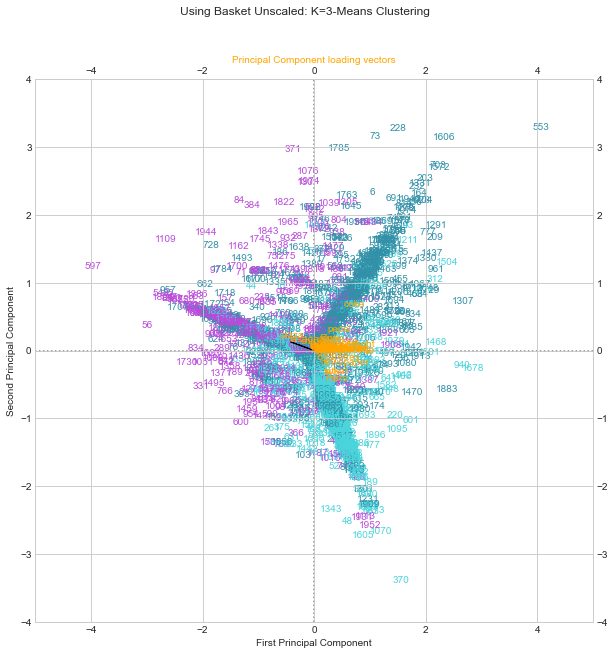

In [30]:
fig , ax1 = plt.subplots(figsize=(10,10))

ax1.set_xlim(-5,5)
ax1.set_ylim(-4,4)

# Plot Principal Components 1 and 2
for i in basket_plot_ns.index:
    ax1.annotate(i, (basket_plot_ns.PC1.loc[i], -basket_plot_ns.PC2.loc[i]), ha='center',color=pick_color(basket['kmeans_label'].loc[i]))

# Plot reference lines
ax1.hlines(0,-5,5, linestyles='dotted', colors='grey')
ax1.vlines(0, -4,4, linestyles='dotted', colors='grey')

ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')
fig.suptitle('Using Basket Unscaled: K=3-Means Clustering')
    
# Plot Principal Component loading vectors, using a second y-axis.
ax2 = ax1.twinx().twiny() 

ax2.set_ylim(-4,4)
ax2.set_xlim(-5,5)
ax2.tick_params(axis='y', colors='orange')
ax2.set_xlabel('Principal Component loading vectors', color='orange')

# Plot labels for vectors. Variable 'a' is a small offset parameter to separate arrow tip and text.
a = 1.07  
for i in pca_loadings[['V1', 'V2']].index:
    ax2.annotate(i, (pca_loadings_ns.V1.loc[i]*a, -pca_loadings_ns.V2.loc[i]*a), color='orange')

# Plot vectors
for i in range(0,2):
    ax2.arrow(0,0,pca_loadings_ns.V1[i], -pca_loadings_ns.V2[i])

It appears that using K-Means clustering with K=3 produces nearly identical results as with agglomerative clustering with three clusters using the ward method. 

# 2

In [31]:
Default = pd.read_csv('Default.csv')

In [32]:
Default

,Unnamed: 0,default,student,balance,income
0,1,No,No,729.526495,44361.62507
1,2,No,Yes,817.180407,12106.13470
2,3,No,No,1073.549164,31767.13895
3,4,No,No,529.250605,35704.49394
4,5,No,No,785.655883,38463.49588
...,...,...,...,...,...
9995,9996,No,No,711.555020,52992.37891
9996,9997,No,No,757.962918,19660.72177
9997,9998,No,No,845.411989,58636.15698
9998,9999,No,No,1569.009053,36669.11236


Use income and balance to predict default.

In [33]:
sns.set(style="white", color_codes=True) 
plt.style.use('ggplot')
%matplotlib inline

import scipy.stats as stats
from sklearn import linear_model, preprocessing 
from sklearn.metrics import *

# and turn off annoying warnings...(if we were writing "real code" we shouldn't do this)
import warnings 
warnings.simplefilter('ignore')

In [34]:
pd.set_option('float_format', '{:.2f}'.format)

In [35]:
analysis_vars1 = ['default','balance','income']
default_real = Default[analysis_vars1].dropna()
default_real.head()

,default,balance,income
0,No,729.53,44361.63
1,No,817.18,12106.13
2,No,1073.55,31767.14
3,No,529.25,35704.49
4,No,785.66,38463.50


In [36]:
default_real['default'] = default_real['default'].str.lower()

In [37]:
conditions = [
    (default_real['default'] == 'no'),
    (default_real['default'] == 'yes')
]

values = [0,1]

default_real['bool_default'] = np.select(conditions,values)

In [38]:
default_real = default_real.drop(columns=['default'])
default_real = default_real.rename(columns={'bool_default':'default'})

In [40]:
regr = linear_model.LogisticRegression()
cols = default_real.columns[0:2]
X_train = default_real[cols]
y_train = default_real.default

In [41]:
regr.fit(X_train, y_train)

LogisticRegression()

In [45]:
analysis_vars2 = ['default','student','balance','income']
default2 = Default[analysis_vars2].dropna()

In [46]:
conditions = [
    (default2['default'] == 'No'),
    (default2['default'] == 'Yes')
]

values = [0,1]

default2['bdefault'] = np.select(conditions,values)

conditions = [
    (default2['student'] == 'No'),
    (default2['student'] == 'Yes')
]

values = [0,1]

default2['bstudent'] = np.select(conditions,values)

In [48]:
default2 = default2.drop(columns=['default','student']).rename(columns={'bdefault':'default','bstudent':'student'})

In [49]:
default2 = default2[['balance','income','student','default']]
default2

,balance,income,student,default
0,729.53,44361.63,0,0
1,817.18,12106.13,1,0
2,1073.55,31767.14,0,0
3,529.25,35704.49,0,0
4,785.66,38463.50,0,0
...,...,...,...,...
9995,711.56,52992.38,0,0
9996,757.96,19660.72,0,0
9997,845.41,58636.16,0,0
9998,1569.01,36669.11,0,0


In [50]:
regr2 = linear_model.LogisticRegression()
cols = default2.columns[0:3]
X_train = default2[cols]
y_train = default2.default

In [52]:
default3 = default2

In [53]:
default3['balXinc'] = default2['balance']*default2['income']
default3['balXstu'] = default2['balance']*default2['student']
default3['incXstu'] = default2['income']*default2['student']

In [54]:
default3 = default3[['balance','income','student','balXinc','balXstu','incXstu','default']]

In [55]:
default3

,balance,income,student,balXinc,balXstu,incXstu,default
0,729.53,44361.63,0,32362980.86,0.00,0.00,0
1,817.18,12106.13,1,9892896.08,817.18,12106.13,0
2,1073.55,31767.14,0,34103585.46,0.00,0.00,0
3,529.25,35704.49,0,18896625.01,0.00,0.00,0
4,785.66,38463.50,0,30219071.82,0.00,0.00,0
...,...,...,...,...,...,...,...
9995,711.56,52992.38,0,37706993.26,0.00,0.00,0
9996,757.96,19660.72,0,14902098.05,0.00,0.00,0
9997,845.41,58636.16,0,49571710.11,0.00,0.00,0
9998,1569.01,36669.11,0,57534169.26,0.00,0.00,0


In [57]:
import statsmodels.api as sm

cols = default_real.columns[0:2]
X_train = default_real[cols]
y_train = default_real.default

log_reg_a = sm.Logit(y_train, X_train).fit()


cols = default2.columns[0:3]
X_train = default2[cols]
y_train = default2.default

log_reg_c = sm.Logit(y_train, X_train).fit()


cols = default3.columns[0:6]
X_train = default3[cols]
y_train = default3.default

log_reg_d = sm.Logit(y_train, X_train).fit()

Optimization terminated successfully.
         Current function value: 0.173456
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.124277
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.080907
         Iterations 10


In [58]:
from IPython.display import display, Latex
display(Latex('$\\text{model a: default} \\sim \\frac{1}{1 + e^{(\\text{balance} \\cdot x_1 + \\text{income} \\cdot x_2)}}$'))
print(log_reg_a.summary())
display(Latex('$\\text{model c: default} \\sim \\frac{1}{1 + e^{(\\text{balance} \\cdot x_1 + \\text{income} \\cdot x_2 + \\text{student} \\cdot x_3)}}$'))
print(log_reg_c.summary())
display(Latex('$\\text{model d: default} \\sim \\frac{1}{1 + e^{(\\text{balance} \\cdot x_1 + \\text{income} \\cdot x_2 + \\text{student} \\cdot x_3 + (\\text{balance} \\cdot \\text{income}) \\cdot x_1 x_2 + (\\text{balance} \\cdot \\text{student}) \\cdot x_1 x_3 + (\\text{income} \\cdot \\text{student}) \\cdot x_2 x_3)}}$'))
print(log_reg_d.summary())

<IPython.core.display.Latex object>

                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9998
Method:                           MLE   Df Model:                            1
Date:                Fri, 18 Feb 2022   Pseudo R-squ.:                 -0.1878
Time:                        18:33:42   Log-Likelihood:                -1734.6
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
balance        0.0004   7.03e-05      5.797      0.000       0.000       0.001
income        -0.0001    3.7e-06    -34.025      0.000      -0.000      -0.000


<IPython.core.display.Latex object>

                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9997
Method:                           MLE   Df Model:                            2
Date:                Fri, 18 Feb 2022   Pseudo R-squ.:                  0.1490
Time:                        18:33:42   Log-Likelihood:                -1242.8
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                 3.274e-95
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
balance        0.0028      0.000     22.291      0.000       0.003       0.003
income        -0.0002   5.18e-06    -33.672      0.000      -0.000      -0.000
student       -3.7531      0.153    -24.580      0.0

<IPython.core.display.Latex object>

                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9994
Method:                           MLE   Df Model:                            5
Date:                Fri, 18 Feb 2022   Pseudo R-squ.:                  0.4460
Time:                        18:33:42   Log-Likelihood:                -809.07
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                1.824e-279
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
balance       -0.0011      0.000     -5.064      0.000      -0.002      -0.001
income        -0.0003   1.17e-05    -23.590      0.000      -0.000      -0.000
student       -6.3093      0.797     -7.914      0.0

Model A:
Supposedly, all coefficients are significant. But, the values of the coefficients are close to zero. So, really, this means that a horizontal line does almost as good of a job fitting the data than the first model. 

Model C:
Again, all coefficients are significant. This time, only the estimate of income is very low. The estimates for the balance and student coefficients are large enough to where there'd be noticeable effects. Particularly, the student coefficient, saying that log odds of a person defaulting go down by -3.75 if the person is a student. 

Model D: 
In the final model, which had interaction terms, the income x student interaction term was the only insignificant parameter. Again, the most notable coefficient was the student coefficient whose value was -6.3, the next most noticable coefficient was balance x student. 